<a href="https://colab.research.google.com/github/suyangegrong/pdm08/blob/main/notebook/chap08_DNN_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DNN with keras

## mse vs. bce 
- meean squared error 
- binary cross-entropy

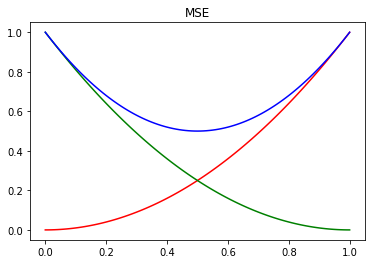

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log


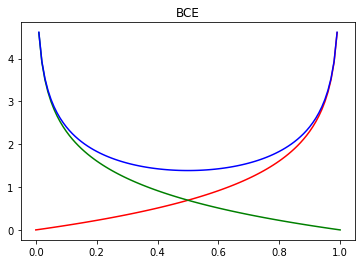

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# MSE
# mse(y,y_hat) = (y - y_hat)**2
#
x = np.linspace(0.0, 1.0, 101) #예측값은 0~1까지 100등분 =  x값
y0 = np.square(x) #정답이 0일때 
y1 = np.square(1-x) #정답이 1일때 
plt.plot(x, y0, 'r') #정답이 0일때 손실함수
plt.plot(x, y1, 'g') #정답이 1일때 손실함수 
plt.plot(x, y0+y1, 'b') # 정확한 mse함수 
plt.title('MSE')
plt.show() 

# BCE
# bce(y,y_hat) = - y log(y_hat) - (1-y) log(1-y_hat)
#
x = np.linspace(0.0, 1.0, 101) 
y0 = -np.log(1-x) #정답0 
y1 = -np.log(x) #정답1 일때 이진 교차 엔트로피 값 
plt.plot(x, y0, 'r') #bce
plt.plot(x, y1, 'g')  #bce = 양쪽 끝으로 갈 때 기울기가 넓게 완만 중앙 = 0
#오차가 클때 빠르게 손실을 줄여준다 , bce의 장점  
plt.plot(x, y0+y1, 'b') #mse
plt.title('BCE')
plt.show() 

## cross-entropy


- BinaryCrossentropy
- CategoricalCrossentropy
- SparseCategoricalCrossentropy

In [ ]:
# import numpy as np
import tensorflow as tf

#BinaryCrossentropy
y_true = [  [1],   [0],   [0],   [1]]  #실제 true 값 1 0 0 1 확률분포
y_pred = [[0.9], [0.1], [0.2], [0.9]]  #prediction 
bce = tf.keras.losses.BinaryCrossentropy() 
print(bce(y_true, y_pred).numpy()) #bce 안의 true 값 predict 값 확률분포를 넣고 .numpy 할 시 소수점이 있는 실수값으로 계산값이 출력됌 
#실제 값 - 예측값의 차이가 없다면 bce값도 작아질 것이다.       

#CategoricalCrossentropy, 3 classes 
y_true = [[0.0, 1.0, 0.0], [0.0, 0.0, 1.0], [1.0, 0.0, 0.0]] # 고양이, 호랑이, 강아지 #실제 값 - 원핫 인코딩 방법 
#y_true = [[0.0, 1.0, 0.0], [0.0, 0.0, 1.0], [1.0, 0.0, 0.0]] # 고양이, 호랑이, 강아지 #실제 값 - 원핫 인코딩 방법 
y_pred = [[0.1, 0.8, 0.1], [0.2, 0.1, 0.7], [0.8, 0.1, 0.1]] # 예측값 , 고양이를 개로 예측, 사슴을 고양이로 , 개를 고양이로 예측 
cce = tf.keras.losses.CategoricalCrossentropy () #각 확률의 분포를 계산하는 것 
print(cce(y_true, y_pred).numpy ())      #cce를 사용할 때 softmax 사용 
#true 값과 예측값이 가까울 수록 손실함수 값은 작게 나온다. 

#SparseCategoricalCrossentropy
y_true = [[1], [2], [0]] # 고양이 호랑이 강아지 
y_pred = [[0.1, 0.8, 0.1], [0.2, 0.1, 0.7], [0.8, 0.1, 0.1]] #3개의 클래스에 대한 확률 결과 
scce = tf.keras.losses.SparseCategoricalCrossentropy () 
print(scce(y_true, y_pred).numpy ())      #cce를 사용할 때 softmax 사용 

y_true = [ 12 , 20 , 29 , 60 ] 
y_pred = [ 14 , 18 , 27 , 55 ]
mse = tf.keras.losses.MeanSquaredError ()
print(mse(y_true, y_pred).numpy())



#########################################
def  custom_loss_function (y_true, y_pred) :
   squared_difference = tf.square (y_true-y_pred)
   return tf.reduce_mean (squared_difference, axis = -1 )




0.13480616
0.26765403
0.26765403
9


## int encoding

In [ ]:
import numpy as np
X = np.array([['Korea', 44, 7200], #범주형(문자) 데이터 
		['Japan', 27, 4800], 
		['China', 30, 6100]])

from sklearn.preprocessing import LabelEncoder 
labelEncoder = LabelEncoder() #LabelEncoder 클래스 객체 생성 

# 원하는 열을 뽑아서 2차원 배열로 만들어서 전달하여야 한다. 
XX = labelEncoder.fit_transform(X[:,0].reshape(-1,1)) #정수로 변환 
print(XX) # 2,1,0 => CHINA 가 제일 빠름 = 0 / JAPN =1 /KOREA=2 

X = np.delete(X, [0], axis=1)		# 0번째 열 삭제
X = np.concatenate((XX.reshape(-1,1), X), axis = 1)	# X와 XX를 붙인다. 
print(X) # 2,1,0 을 숫자만 있는 배열 X와 합쳐줌 


[2 1 0]
[['2' '44' '7200']
 ['1' '27' '4800']
 ['0' '30' '6100']]


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## one-hot encoding 

In [ ]:
class_vector =[2, 6, 6, 1]
  
from tensorflow.keras.utils import to_categorical 
output = to_categorical(class_vector, num_classes = 7, dtype ="int32") #num_classes 0까지 포함 ~6 = 7개 
print(output) #인덱스 2,,6,,6,,1에 해당하는 값 = 1 나머지 0 

#
# mnist data
#
import tensorflow as tf
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
print(x_train.shape,y_train.shape) #train 3차원  

y_train[:10] #mnist 정수로 된 label 을 원핫 인코딩으로 변환하자.  

y_train_one_hot = to_categorical(y_train, num_classes = 10, dtype ="int32") #dtype=int32로 확장해야 실수가 아니라 정수로 출력된다. 
y_train_one_hot.shape
y_train_one_hot[:10]


[[0 0 1 0 0 0 0]
 [0 0 0 0 0 0 1]
 [0 0 0 0 0 0 1]
 [0 1 0 0 0 0 0]]
11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)


array([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]], dtype=int32)

## Scaler 
- MinMaxScaler 
- StandardScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler #데이터 분포의 최소 0 최대 1 로 변경 
data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]

scaler = MinMaxScaler()
scaler.fit(data)		# 최대값과 최소값을 알아낸다. 
print(scaler.transform(data))	# 데이터를 변환한다. 

# StandardScaler()
from sklearn.preprocessing import StandardScaler #표준 정규화 = 데이터 분포를 평균 0 표준편차 1로 변경 
data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]] #중앙 0 최소 -1 최대 1 
# data = [[-1, 2, 7], [-0.5, 6, 3], [0, 10, -2], [1, 18, 6]]

scaler = StandardScaler()
scaler.fit(data)		# 평균=0, 분산=std 로 데이터 변경
print(scaler.transform(data))	# 데이터를 변환한다. x축에 대해 평균 0 표준편차 1 | y축에 대해 평균 0 표준편차 1 바꿈


[[0.   0.  ]
 [0.25 0.25]
 [0.5  0.5 ]
 [1.   1.  ]]
[[-1.18321596 -1.18321596]
 [-0.50709255 -0.50709255]
 [ 0.16903085  0.16903085]
 [ 1.52127766  1.52127766]]


## Normalization layer 

In [ ]:
import numpy as np
from  tensorflow.keras.layers.experimental.preprocessing import Normalization

input_data = np.array([[1.], [2.], [3.]], np.float32)
layer = Normalization()
print(layer(input_data))

#
adapt_data = np.array([[1.], [2.], [3.], [4.], [5.]], dtype=np.float32)
input_data = np.array([[1.], [2.], [3.]], np.float32)
layer = Normalization()
layer.adapt(adapt_data)
print(layer(input_data))


tf.Tensor(
[[1.]
 [2.]
 [3.]], shape=(3, 1), dtype=float32)
tf.Tensor(
[[-1.4142135 ]
 [-0.70710677]
 [ 0.        ]], shape=(3, 1), dtype=float32)


## IMDB 영화평 학습 

17464789/17464789 [==============================] - 0s 0us/step
Epoch 1/20
49/49 [==============================] - 2s 14ms/step - loss: 0.5678 - accuracy: 0.7266 - val_loss: 0.4262 - val_accuracy: 0.8226
Epoch 2/20
49/49 [==============================] - 0s 9ms/step - loss: 0.3654 - accuracy: 0.8489 - val_loss: 0.3436 - val_accuracy: 0.8567
Epoch 3/20
49/49 [==============================] - 0s 9ms/step - loss: 0.3223 - accuracy: 0.8672 - val_loss: 0.3318 - val_accuracy: 0.8606
Epoch 4/20
49/49 [==============================] - 0s 9ms/step - loss: 0.3103 - accuracy: 0.8715 - val_loss: 0.3310 - val_accuracy: 0.8588
Epoch 5/20
49/49 [==============================] - 0s 9ms/step - loss: 0.3042 - accuracy: 0.8741 - val_loss: 0.3320 - val_accuracy: 0.8587
Epoch 6/20
49/49 [==============================] - 0s 9ms/step - loss: 0.3000 - accuracy: 0.8771 - val_loss: 0.3323 - val_accuracy: 0.8598
Epoch 7/20
49/49 [==============================] - 0s 9ms/step - loss: 0.2968 - accuracy: 0.8

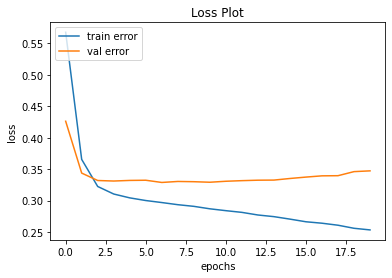

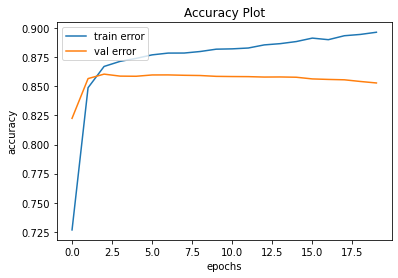

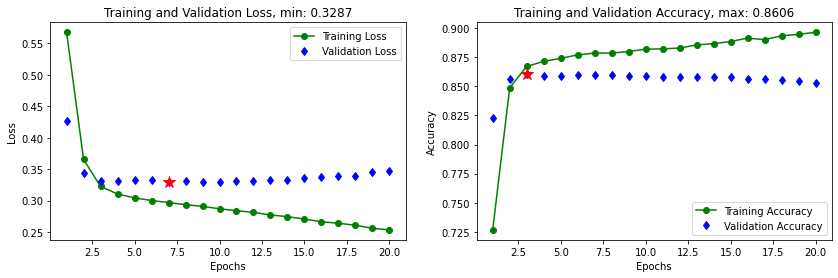

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# 데이터 다운로드
(train_data, train_labels), (test_data, test_labels) = \
    tf.keras.datasets.imdb.load_data(num_words=1000)
len(train_data[0]),np.unique(train_data[0]).size #218개의 영화평에서 서로 같은 단어를 빼면 총 97개의 단어로 구성되있다. 
len(train_data[1]),np.unique(train_data[1]).size #25000개 관전평 중 2번째 관전평은 총 189개의 단어가 있고 중복을 빼면 91개의 단어가 있다. 
train_data[0] 
max(train_data.max())
train_data.shape,train_labels.shape #25000개의 관전평 그중 1번째 영화평은 218개의 영화평이, 거기서 중복을 빼면 97개의 단어가 있다.

# 원-핫 인코딩으로 변환하는 함수
def one_hot_sequences(sequences, dimension=1000): #단어들이 1000개의 영화평 단어중 몇번째 에 있는지 1로 나머진 0으로 나타내줌. 
    results = np.zeros((len(sequences), dimension))
    for i, word_index in enumerate(sequences):
        results[i, word_index] = 1.
    return results

train_data = one_hot_sequences(train_data)
test_data = one_hot_sequences(test_data)

train_data.shape,test_data.shape 
train_data[0]

# 신경망 모델 구축
model = tf.keras.Sequential() #0.5보다 크면 긍정 작으면 부정 => sigmoid 
model.add(tf.keras.layers.Dense(16, activation='relu', input_shape=(1000,)))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', #0과1을 평가하기에 이진평가를, otimizier은 adam, 정확도 위주 평가 
                  metrics=['accuracy'])

# 신경망 훈련, 검증 데이터 전달
history = model.fit(train_data,
                    train_labels,
                    epochs=20,
                    batch_size=512,
                    validation_data=(test_data, test_labels),
                    verbose=1)
# 훈련 데이터의 손실값과 검증 데이터의 손실값을 그래프에 출력
history_dict = history.history
loss_values = history_dict['loss']		# 훈련 데이터 손실값
val_loss_values = history_dict['val_loss']	# 검증 데이터 손실값
acc = history_dict['accuracy']			# 정확도
epochs = range(1, len(acc) + 1)		# 에포크 수

plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss'])
plt.title('Loss Plot')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train error', 'val error'], loc='upper left')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy Plot')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train error', 'val error'], loc='upper left')
plt.show()

#############################################
# More training graphs
# More graphs of loss and accuracy
# import matplotlib.pyplot as plt
import numpy as np

history_dict = history.history 
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(14, 4))

plt.subplot(1,2,1)
plt.plot(epochs, loss, 'go-', label='Training Loss')
plt.plot(epochs, val_loss, 'bd', label='Validation Loss')
plt.plot(np.argmin(np.array(val_loss))+1,val_loss[np.argmin(np.array(val_loss))], 'r*', ms=12)
plt.title('Training and Validation Loss, min: ' + str(np.round(val_loss[np.argmin(np.array(val_loss))],4)))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1, len(loss) + 1)

plt.subplot(1,2,2)
plt.plot(epochs, acc, 'go-', label='Training Accuracy') #, c='blue')
plt.plot(epochs, val_acc, 'bd', label='Validation Accuracy') #, c='red')
plt.plot(np.argmax(np.array(val_acc))+1,val_acc[np.argmax(np.array(val_acc))], 'r*', ms=12)
plt.title('Training and Validation Accuracy, max: ' + str(np.round(val_acc[np.argmax(np.array(val_acc))],4)))
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## IMDB 영화평
- L2 규제 
- Dropout 

### L2 규제 

Epoch 1/20
49/49 - 1s - loss: 0.5947 - accuracy: 0.7145 - val_loss: 0.4427 - val_accuracy: 0.8320 - 1s/epoch - 25ms/step
Epoch 2/20
49/49 - 0s - loss: 0.3981 - accuracy: 0.8504 - val_loss: 0.3821 - val_accuracy: 0.8570 - 427ms/epoch - 9ms/step
Epoch 3/20
49/49 - 0s - loss: 0.3610 - accuracy: 0.8694 - val_loss: 0.3713 - val_accuracy: 0.8595 - 410ms/epoch - 8ms/step
Epoch 4/20
49/49 - 0s - loss: 0.3490 - accuracy: 0.8732 - val_loss: 0.3677 - val_accuracy: 0.8606 - 426ms/epoch - 9ms/step
Epoch 5/20
49/49 - 0s - loss: 0.3446 - accuracy: 0.8736 - val_loss: 0.3673 - val_accuracy: 0.8596 - 390ms/epoch - 8ms/step
Epoch 6/20
49/49 - 0s - loss: 0.3399 - accuracy: 0.8743 - val_loss: 0.3632 - val_accuracy: 0.8604 - 404ms/epoch - 8ms/step
Epoch 7/20
49/49 - 0s - loss: 0.3368 - accuracy: 0.8757 - val_loss: 0.3626 - val_accuracy: 0.8599 - 415ms/epoch - 8ms/step
Epoch 8/20
49/49 - 0s - loss: 0.3350 - accuracy: 0.8758 - val_loss: 0.3626 - val_accuracy: 0.8599 - 392ms/epoch - 8ms/step
Epoch 9/20
49/49 -

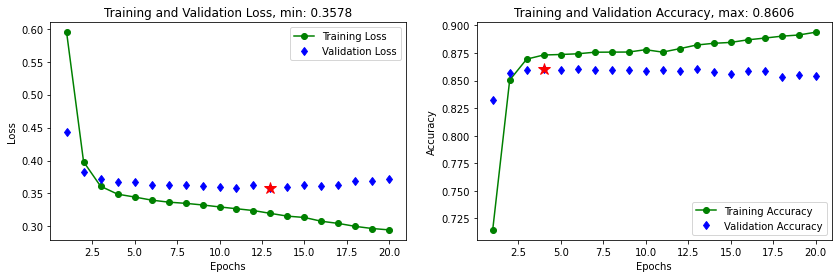

In [ ]:
# L2규제 
import numpy as numpy
import tensorflow as tf
import matplotlib.pyplot as plt

# 데이터 다운로드
(train_data, train_labels), (test_data, test_labels) = \
    tf.keras.datasets.imdb.load_data( num_words=1000)

# 원-핫 인코딩으로 변환하는 함수
def one_hot_sequences(sequences, dimension=1000):
    results = numpy.zeros((len(sequences), dimension))
    for i, word_index in enumerate(sequences):
        results[i, word_index] = 1.
    return results

train_data = one_hot_sequences(train_data)
test_data = one_hot_sequences(test_data)

# 신경망 모델 구축
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(16, 
	kernel_regularizer=tf.keras.regularizers.l2(0.001),  
	activation='relu', input_shape=(1000,)))
model.add(tf.keras.layers.Dense(16,		 
	kernel_regularizer=tf.keras.regularizers.l2(0.001),  activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam',
                  metrics=['accuracy']) #가중치를 규제 안한 imdb_A 보다 오버fitting이 완화됌 

# 신경망 훈련, 검증 데이터 전달
history = model.fit(train_data,
                    train_labels,
                    epochs=20,
                    batch_size=512,
                    validation_data=(test_data, test_labels),
                    verbose=2)
# 훈련 데이터의 손실값과 검증 데이터의 손실값을 그래프에 출력
#############################################
# More training graphs
# More graphs of loss and accuracy
# import matplotlib.pyplot as plt
import numpy as np

history_dict = history.history 
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(14, 4))

plt.subplot(1,2,1)
plt.plot(epochs, loss, 'go-', label='Training Loss')
plt.plot(epochs, val_loss, 'bd', label='Validation Loss')
plt.plot(np.argmin(np.array(val_loss))+1,val_loss[np.argmin(np.array(val_loss))], 'r*', ms=12)
plt.title('Training and Validation Loss, min: ' + str(np.round(val_loss[np.argmin(np.array(val_loss))],4)))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1, len(loss) + 1)

plt.subplot(1,2,2)
plt.plot(epochs, acc, 'go-', label='Training Accuracy') #, c='blue')
plt.plot(epochs, val_acc, 'bd', label='Validation Accuracy') #, c='red')
plt.plot(np.argmax(np.array(val_acc))+1,val_acc[np.argmax(np.array(val_acc))], 'r*', ms=12)
plt.title('Training and Validation Accuracy, max: ' + str(np.round(val_acc[np.argmax(np.array(val_acc))],4)))
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Dropout

Epoch 1/20
49/49 - 1s - loss: 0.6867 - accuracy: 0.5630 - val_loss: 0.6556 - val_accuracy: 0.6864 - 1s/epoch - 24ms/step
Epoch 2/20
49/49 - 0s - loss: 0.6319 - accuracy: 0.6624 - val_loss: 0.5822 - val_accuracy: 0.7784 - 406ms/epoch - 8ms/step
Epoch 3/20
49/49 - 0s - loss: 0.5612 - accuracy: 0.7328 - val_loss: 0.4830 - val_accuracy: 0.8332 - 421ms/epoch - 9ms/step
Epoch 4/20
49/49 - 0s - loss: 0.4988 - accuracy: 0.7929 - val_loss: 0.4193 - val_accuracy: 0.8488 - 421ms/epoch - 9ms/step
Epoch 5/20
49/49 - 0s - loss: 0.4555 - accuracy: 0.8200 - val_loss: 0.3803 - val_accuracy: 0.8541 - 398ms/epoch - 8ms/step
Epoch 6/20
49/49 - 0s - loss: 0.4311 - accuracy: 0.8309 - val_loss: 0.3594 - val_accuracy: 0.8592 - 429ms/epoch - 9ms/step
Epoch 7/20
49/49 - 0s - loss: 0.4114 - accuracy: 0.8411 - val_loss: 0.3502 - val_accuracy: 0.8586 - 411ms/epoch - 8ms/step
Epoch 8/20
49/49 - 0s - loss: 0.4015 - accuracy: 0.8428 - val_loss: 0.3429 - val_accuracy: 0.8580 - 436ms/epoch - 9ms/step
Epoch 9/20
49/49 -

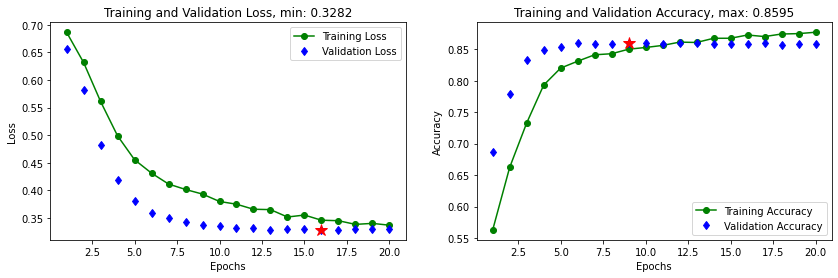

In [ ]:
import numpy as numpy
import tensorflow as tf
import matplotlib.pyplot as plt

# 데이터 다운로드
(train_data, train_labels), (test_data, test_labels) = \
    tf.keras.datasets.imdb.load_data( num_words=1000)

# 원-핫 인코딩으로 변환하는 함수
def one_hot_sequences(sequences, dimension=1000):
    results = numpy.zeros((len(sequences), dimension))
    for i, word_index in enumerate(sequences):
        results[i, word_index] = 1.
    return results

train_data = one_hot_sequences(train_data)
test_data = one_hot_sequences(test_data)

# 신경망 모델 구축
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(16, activation='relu', input_shape=(1000,)))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam',
                  metrics=['accuracy'])

# 신경망 훈련, 검증 데이터 전달
history = model.fit(train_data,
                    train_labels,
                    epochs=20,
                    batch_size=512,
                    validation_data=(test_data, test_labels),
                    verbose=2)
# 훈련 데이터의 손실값과 검증 데이터의 손실값을 그래프에 출력
#############################################
# More training graphs
# More graphs of loss and accuracy
# import matplotlib.pyplot as plt
import numpy as np

history_dict = history.history 
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(14, 4))

plt.subplot(1,2,1)
plt.plot(epochs, loss, 'go-', label='Training Loss')
plt.plot(epochs, val_loss, 'bd', label='Validation Loss')
plt.plot(np.argmin(np.array(val_loss))+1,val_loss[np.argmin(np.array(val_loss))], 'r*', ms=12)
plt.title('Training and Validation Loss, min: ' + str(np.round(val_loss[np.argmin(np.array(val_loss))],4)))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1, len(loss) + 1)

plt.subplot(1,2,2)
plt.plot(epochs, acc, 'go-', label='Training Accuracy') #, c='blue')
plt.plot(epochs, val_acc, 'bd', label='Validation Accuracy') #, c='red')
plt.plot(np.argmax(np.array(val_acc))+1,val_acc[np.argmax(np.array(val_acc))], 'r*', ms=12)
plt.title('Training and Validation Accuracy, max: ' + str(np.round(val_acc[np.argmax(np.array(val_acc))],4)))
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## MNIST : DNN 

(60000, 28, 28) (60000,)
Epoch 1/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2244 - accuracy: 0.9330 - val_loss: 0.1225 - val_accuracy: 0.9618
Epoch 2/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0984 - accuracy: 0.9697 - val_loss: 0.0912 - val_accuracy: 0.9719
Epoch 3/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0686 - accuracy: 0.9781 - val_loss: 0.0793 - val_accuracy: 0.9754
Epoch 4/20
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0533 - accuracy: 0.9827 - val_loss: 0.0712 - val_accuracy: 0.9788
Epoch 5/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0433 - accuracy: 0.9861 - val_loss: 0.0654 - val_accuracy: 0.9792
Epoch 6/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0362 - accuracy: 0.9880 - val_loss: 0.0771 - val_accuracy: 0.9797
Epoch 7/20
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0305 - accuracy: 0.9896 - 

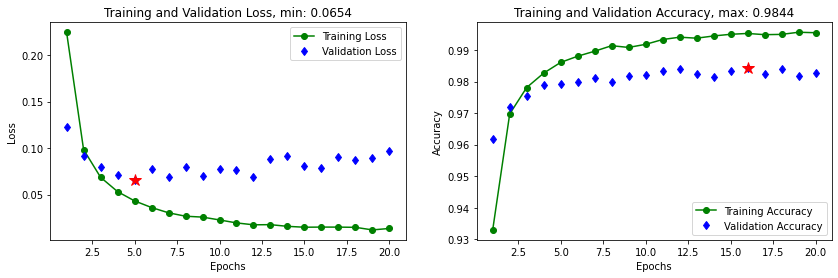

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf

mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data() #label 을 y를 붙인다. 
x_train, x_test = x_train / 255.0, x_test / 255.0 #0~255의 정수를 255.0으로 나눔으로써 0~1.0 사이의 실수로 정규화 시킨다. 

print(x_train.shape,y_train.shape) #

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28))) #28X28 의 2차원 데이터를 784, 1차원 벡터로 바꿔준다. 
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2)) #29%를 제외시킨다. 
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, 
          epochs=20,
          validation_data=(x_test, y_test),
          verbose=1)

model.evaluate(x_test, y_test)

#############################################
# More training graphs
# More graphs of loss and accuracy
# import matplotlib.pyplot as plt
import numpy as np

history_dict = history.history 
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(14, 4))

plt.subplot(1,2,1)
plt.plot(epochs, loss, 'go-', label='Training Loss')
plt.plot(epochs, val_loss, 'bd', label='Validation Loss')
plt.plot(np.argmin(np.array(val_loss))+1,val_loss[np.argmin(np.array(val_loss))], 'r*', ms=12)
plt.title('Training and Validation Loss, min: ' + str(np.round(val_loss[np.argmin(np.array(val_loss))],4)))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1, len(loss) + 1)

plt.subplot(1,2,2)
plt.plot(epochs, acc, 'go-', label='Training Accuracy') #, c='blue')
plt.plot(epochs, val_acc, 'bd', label='Validation Accuracy') #, c='red')
plt.plot(np.argmax(np.array(val_acc))+1,val_acc[np.argmax(np.array(val_acc))], 'r*', ms=12)
plt.title('Training and Validation Accuracy, max: ' + str(np.round(val_acc[np.argmax(np.array(val_acc))],4)))
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

